In [1]:
## Data Encoding and Decoding
## Encoding explanation in comments
## This script demonstrates how to encode a string into bytes and then decode it back to a string using UTF-8 encoding.
# Define the original string
original_string = "Hello, World!"
# Encode the string into bytes using UTF-8 encoding
encoded_bytes = original_string.encode('utf-8')
# Decode the bytes back into a string using UTF-8 encoding
decoded_string = encoded_bytes.decode('utf-8')
# Print the results
print(f"Original String: {original_string}")
print(f"Encoded Bytes: {encoded_bytes}")
print(f"Decoded String: {decoded_string}")

Original String: Hello, World!
Encoded Bytes: b'Hello, World!'
Decoded String: Hello, World!


In [2]:
## Nominal/one-hot encoding explanation in comments
## This script demonstrates how to perform one-hot encoding on a list of categorical variables using pandas.
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Define a list of categorical variables
categories = ['red', 'blue', 'green', 'blue', 'red']
# Convert the list into a DataFrame
df = pd.DataFrame(categories, columns=['Color'])
# Initialize the OneHotEncoder
encoder = OneHotEncoder()
# Fit and transform the data to get one-hot encoded representation
one_hot_encoded = encoder.fit_transform(df[['Color']])
# Convert the result into a DataFrame for better visualization
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['Color']))
# Print the original and one-hot encoded DataFrames
print("\nOriginal DataFrame:")
print(df)
print("\nOne-Hot Encoded DataFrame:")
print(one_hot_df)


Original DataFrame:
   Color
0    red
1   blue
2  green
3   blue
4    red

One-Hot Encoded DataFrame:
   Color_blue  Color_green  Color_red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0
4         0.0          0.0        1.0


In [3]:
import seaborn as sns
df=sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
en = OneHotEncoder()
en_cat = en.fit_transform(df[['sex', 'smoker', 'day', 'time']]).toarray()
one_hot_df = pd.DataFrame(en_cat, columns=en.get_feature_names_out(['sex', 'smoker', 'day', 'time']))
one_hot_df

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [6]:
oh_df=pd.concat([df,one_hot_df],axis=1)
oh_df.drop(columns=['sex', 'smoker', 'day', 'time'],inplace=True)
oh_df.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [7]:
oh_df.isnull().sum()

total_bill     0
tip            0
size           0
sex_Female     0
sex_Male       0
smoker_No      0
smoker_Yes     0
day_Fri        0
day_Sat        0
day_Sun        0
day_Thur       0
time_Dinner    0
time_Lunch     0
dtype: int64

In [8]:
oh_df.shape

(244, 13)

In [9]:
#train test split
from sklearn.model_selection import train_test_split
X=oh_df.drop(columns=['tip'])
y=oh_df['tip']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((195, 12), (49, 12), (195,), (49,))

In [10]:
#predicting with linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

/var/folders/gj/j1hqs7h13gg3xlcz516gvgcr0000gn/T/ipykernel_53912/3600700346.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


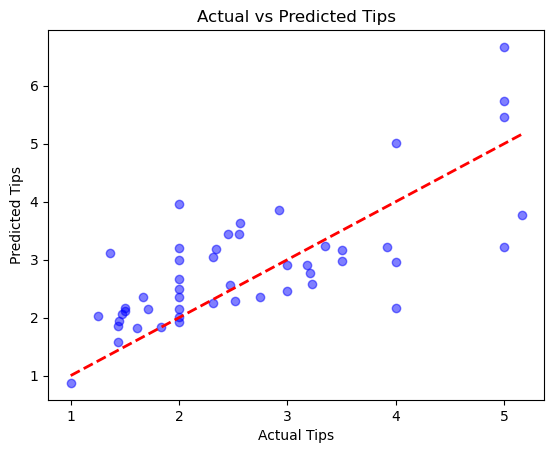

In [13]:
#ypred vs ytest different colors
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Actual vs Predicted Tips')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.show()

In [14]:
#Label Encoding explanation in comments
# This script demonstrates how to perform label encoding on a list of categorical variables using sklearn.
from sklearn.preprocessing import LabelEncoder
# Define a list of categorical variables
categories = ['red', 'blue', 'green', 'blue', 'red']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the data to get label encoded representation
label_encoded = label_encoder.fit_transform(categories)
# Print the original categories and their corresponding label encoded values
print("\nOriginal Categories:")
print(categories)
print("\nLabel Encoded Values:")
print(label_encoded)


Original Categories:
['red', 'blue', 'green', 'blue', 'red']

Label Encoded Values:
[2 0 1 0 2]


In [15]:
# repeat the above steps for label encoding on the 'tips' dataset
# Load the dataset
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df = sns.load_dataset('tips')
# Initialize the LabelEncoder
le = LabelEncoder()
# Apply label encoding to categorical columns
for col in ['sex', 'smoker', 'day', 'time']:
    df[col] = le.fit_transform(df[col])
# Display the first few rows of the modified DataFrame
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [17]:
#Ordinal Encoding explanation in comments
# This script demonstrates how to perform ordinal encoding on a list of categorical variables using sklearn.
from sklearn.preprocessing import OrdinalEncoder
# Define a list of categorical variables with an inherent order
categories = ['low', 'medium', 'high', 'medium', 'low']
# Convert the list into a DataFrame
df = pd.DataFrame(categories, columns=['Priority'])
# Initialize the OrdinalEncoder
encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
# Fit and transform the data to get ordinal encoded representation
ordinal_encoded = encoder.fit_transform(df[['Priority']])
# Print the original and ordinal encoded DataFrames
print("\nOriginal DataFrame:")
print(df)
print("\nOrdinal Encoded DataFrame:")
print(ordinal_encoded)


Original DataFrame:
  Priority
0      low
1   medium
2     high
3   medium
4      low

Ordinal Encoded DataFrame:
[[0.]
 [1.]
 [2.]
 [1.]
 [0.]]


In [18]:
# repeat the above steps for ordinal encoding on the 'tips' dataset
# Load the dataset
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
df = sns.load_dataset('tips')   
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
# Reload the original tips dataset to get string columns for 'day' and 'time'
import seaborn as sns
df = sns.load_dataset('tips')

# Assign ordinal encoder with ranks
ord_enc = OrdinalEncoder(categories=[['Thur', 'Fri', 'Sat', 'Sun'], ['Lunch', 'Dinner']])
df[['day', 'time']] = ord_enc.fit_transform(df[['day', 'time']])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,3.0,1.0,2
1,10.34,1.66,Male,No,3.0,1.0,3
2,21.01,3.50,Male,No,3.0,1.0,3
3,23.68,3.31,Male,No,3.0,1.0,2
4,24.59,3.61,Female,No,3.0,1.0,4


In [26]:
# Target Guided Encoding explanation in comments
# This script demonstrates how to perform target guided encoding on a categorical variable using pandas.
import pandas as pd
# Create a sample DataFrame
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B'],
        'Target': [10, 20, 15, 30, 25, 10, 35, 20]}
df = pd.DataFrame(data)
# Calculate the mean of the target variable and assign mean to each category
mean_target = df.groupby('Category')['Target'].mean()
df['Category_Encoded'] = df['Category'].map(mean_target)
# Display the DataFrame with the new encoded column
df.head()

,Category,Target,Category_Encoded
0,A,10,11.666667
1,B,20,21.666667
2,A,15,11.666667
3,C,30,32.500000
4,B,25,21.666667
